In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv(r"corporateCreditRatingWithFinancialRatios.csv")
print("Shape:", df.shape)
print("Columns:", df.columns)
df['Rating Date'] = pd.to_datetime(df['Rating Date'], errors='coerce')
df['Rating_Year'] = df['Rating Date'].dt.year
df = df.drop(columns= ["Corporation", "Ticker", 'CIK', 'Rating Date'])
df.head()

Shape: (7805, 25)
Columns: Index(['Rating Agency', 'Corporation', 'Rating', 'Rating Date', 'CIK',
       'Binary Rating', 'SIC Code', 'Sector', 'Ticker', 'Current Ratio',
       'Long-term Debt / Capital', 'Debt/Equity Ratio', 'Gross Margin',
       'Operating Margin', 'EBIT Margin', 'EBITDA Margin',
       'Pre-Tax Profit Margin', 'Net Profit Margin', 'Asset Turnover',
       'ROE - Return On Equity', 'Return On Tangible Equity',
       'ROA - Return On Assets', 'ROI - Return On Investment',
       'Operating Cash Flow Per Share', 'Free Cash Flow Per Share'],
      dtype='object')


Rating Agency Rating  Binary Rating  SIC Code Sector  \
0  Standard & Poor's Ratings Services     A-              1      4941  Utils   
1  Standard & Poor's Ratings Services    AAA              1      7374  BusEq   
2  Standard & Poor's Ratings Services   BBB-              1      5065  Shops   
3  Standard & Poor's Ratings Services    AA-              1      4941  Utils   
4  Standard & Poor's Ratings Services      A              1      5122  Shops   

   Current Ratio  Long-term Debt / Capital  Debt/Equity Ratio  Gross Margin  \
0         1.1507                    0.4551             0.8847       77.6230   
1         1.1129                    0.0072             0.0073       43.6619   
2         1.9276                    0.2924             0.4255       11.9008   
3         0.8358                    0.4708             0.9491       64.5096   
4         1.2931                    0.2644             0.4036        3.8385   

   Operating Margin  ...  Pre-Tax Profit Margin  Net Profit Margin  \
0           19.4839  ...                13.6093             8.3224   
1           19.8327  ...                20.8699            13.5690   
2            3.3173  ...                 3.0536             2.1418   
3           18.4549  ...                15.1135             9.0246   
4            1.3269  ...                 1.2304             0.6518   

   Asset Turnover  ROE - Return On Equity  Return On Tangible Equity  \
0          0.3173                  8.1724                     8.1978   
1          0.3324                 22.0354                    47.2858   
2          2.4620                 13.6376                    16.7991   
3          0.2946                  9.6412                     9.7015   
4          4.9276                 11.1256                    19.4184   

   ROA - Return On Assets  ROI - Return On Investment  \
0                  2.6385                      4.4530   
1                  4.4944                     21.8765   
2                  5.2731                      9.6494   
3                  2.6583                      5.1018   
4                  2.9364                      8.1844   

   Operating Cash Flow Per Share  Free Cash Flow Per Share  Rating_Year  
0                         1.9957                   -0.1333         2010  
1                         0.2501                    0.3132         2010  
2                        -7.6079                   -7.3231         2010  
3                         1.7438                   -0.8999         2010  
4                         1.9725                    2.4174         2010  

[5 rows x 22 columns]

In [24]:
rating_map_5 = {
    'AAA': 'AAA-AA', 'AA+': 'AAA-AA', 'AA': 'AAA-AA', 'AA-': 'AAA-AA',
    'A+': 'A', 'A': 'A', 'A-': 'A',
    'BBB+': 'BBB', 'BBB': 'BBB', 'BBB-': 'BBB',
    'BB+': 'BB', 'BB': 'BB', 'BB-': 'BB',
    'B+': 'B and Below', 'B': 'B and Below', 'B-': 'B and Below',
    'CCC+': 'B and Below', 'CCC': 'B and Below', 'CCC-': 'B and Below',
    'CC+': 'B and Below', 'CC': 'B and Below',
    'C': 'B and Below', 'D': 'B and Below'
}

df['Rating'] = df['Rating'].map(rating_map_5)
df.head()


Rating Agency  Rating  Binary Rating  SIC Code Sector  \
0  Standard & Poor's Ratings Services       A              1      4941  Utils   
1  Standard & Poor's Ratings Services  AAA-AA              1      7374  BusEq   
2  Standard & Poor's Ratings Services     BBB              1      5065  Shops   
3  Standard & Poor's Ratings Services  AAA-AA              1      4941  Utils   
4  Standard & Poor's Ratings Services       A              1      5122  Shops   

   Current Ratio  Long-term Debt / Capital  Debt/Equity Ratio  Gross Margin  \
0         1.1507                    0.4551             0.8847       77.6230   
1         1.1129                    0.0072             0.0073       43.6619   
2         1.9276                    0.2924             0.4255       11.9008   
3         0.8358                    0.4708             0.9491       64.5096   
4         1.2931                    0.2644             0.4036        3.8385   

   Operating Margin  ...  Pre-Tax Profit Margin  Net Profit Margin  \
0           19.4839  ...                13.6093             8.3224   
1           19.8327  ...                20.8699            13.5690   
2            3.3173  ...                 3.0536             2.1418   
3           18.4549  ...                15.1135             9.0246   
4            1.3269  ...                 1.2304             0.6518   

   Asset Turnover  ROE - Return On Equity  Return On Tangible Equity  \
0          0.3173                  8.1724                     8.1978   
1          0.3324                 22.0354                    47.2858   
2          2.4620                 13.6376                    16.7991   
3          0.2946                  9.6412                     9.7015   
4          4.9276                 11.1256                    19.4184   

   ROA - Return On Assets  ROI - Return On Investment  \
0                  2.6385                      4.4530   
1                  4.4944                     21.8765   
2                  5.2731                      9.6494   
3                  2.6583                      5.1018   
4                  2.9364                      8.1844   

   Operating Cash Flow Per Share  Free Cash Flow Per Share  Rating_Year  
0                         1.9957                   -0.1333         2010  
1                         0.2501                    0.3132         2010  
2                        -7.6079                   -7.3231         2010  
3                         1.7438                   -0.8999         2010  
4                         1.9725                    2.4174         2010  

[5 rows x 22 columns]

In [25]:
# Display number of unique values per column
unique_counts = df.nunique().sort_values(ascending=False)

print("Number of Unique Values per Column")
print(unique_counts)

Number of Unique Values per Column
ROE - Return On Equity           2651
EBITDA Margin                    2649
Pre-Tax Profit Margin            2649
EBIT Margin                      2648
Return On Tangible Equity        2648
Operating Margin                 2648
Net Profit Margin                2642
ROI - Return On Investment       2641
ROA - Return On Assets           2632
Gross Margin                     2601
Operating Cash Flow Per Share    2590
Free Cash Flow Per Share         2585
Current Ratio                    2521
Debt/Equity Ratio                2484
Asset Turnover                   2424
Long-term Debt / Capital         2241
SIC Code                          240
Sector                             12
Rating Agency                       7
Rating_Year                         7
Rating                              5
Binary Rating                       2
dtype: int64


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7805 entries, 0 to 7804
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Rating Agency                  7805 non-null   object 
 1   Rating                         7805 non-null   object 
 2   Binary Rating                  7805 non-null   int64  
 3   SIC Code                       7805 non-null   int64  
 4   Sector                         7805 non-null   object 
 5   Current Ratio                  7805 non-null   float64
 6   Long-term Debt / Capital       7805 non-null   float64
 7   Debt/Equity Ratio              7805 non-null   float64
 8   Gross Margin                   7805 non-null   float64
 9   Operating Margin               7805 non-null   float64
 10  EBIT Margin                    7805 non-null   float64
 11  EBITDA Margin                  7805 non-null   float64
 12  Pre-Tax Profit Margin          7805 non-null   f

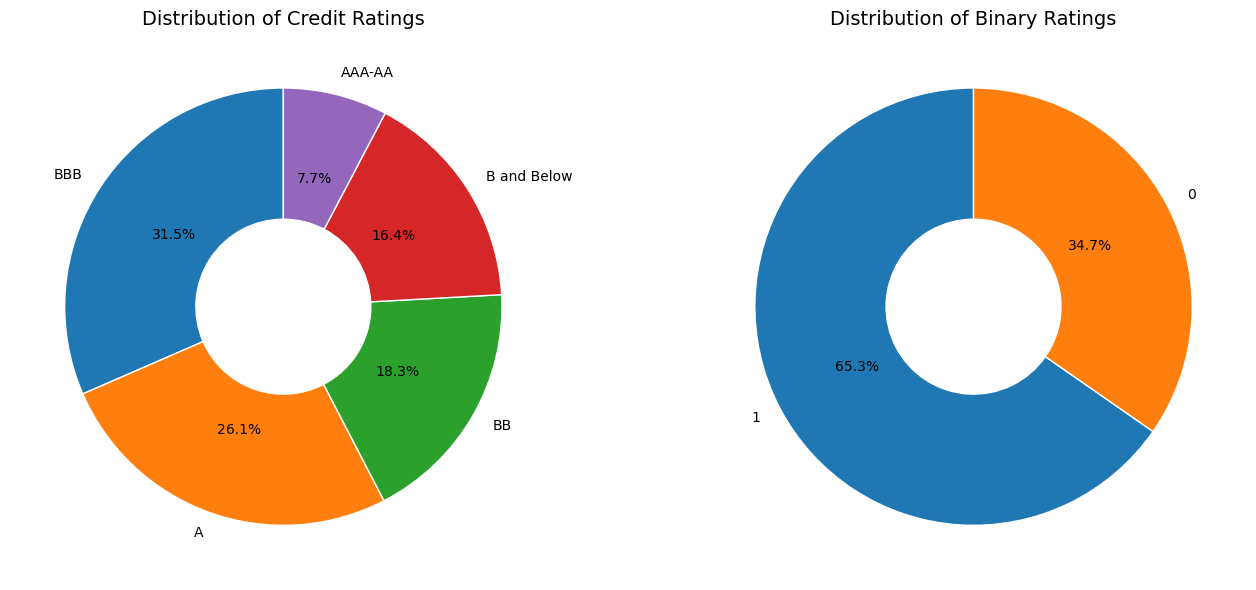

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

# 1x2 Donut Charts
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# --- Donut chart for 'Rating' ---
rating_counts = df['Rating'].value_counts(dropna=False)
axes[0].pie(
    rating_counts,
    labels=rating_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    textprops={'fontsize': 10},
    wedgeprops={'width': 0.6, 'edgecolor': 'white'}  # this makes it a donut
)
axes[0].set_title('Distribution of Credit Ratings', fontsize=14)

# --- Donut chart for 'Binary Rating' ---
binary_counts = df['Binary Rating'].value_counts(dropna=False)
axes[1].pie(
    binary_counts,
    labels=binary_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    textprops={'fontsize': 10},
    wedgeprops={'width': 0.6, 'edgecolor': 'white'}
)
axes[1].set_title('Distribution of Binary Ratings', fontsize=14)

# Final touches
plt.tight_layout()
plt.show()


In [ ]:

df_encoded = df.copy()
categorical_cols = df_encoded.select_dtypes(include=['object']).columns

le = LabelEncoder()
for col in categorical_cols:
    try:
        df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    except Exception as e:
        print(f"Skipping {col} due to error: {e}")

# --- Step 2: Compute correlation matrix ---
corr = df_encoded.corr(numeric_only=True)

# --- Step 3: Interactive heatmap using Plotly ---
fig = go.Figure(
    data=go.Heatmap(
        z=corr.values,
        x=corr.columns,
        y=corr.columns,
        colorscale='RdBu',  # red for -1, blue for +1
        zmin=-1,
        zmax=1,
        text=[[f"{i} ↔ {j}<br>Corr = {corr.loc[i, j]:.3f}" for j in corr.columns] for i in corr.columns],
        hoverinfo="text"
    )
)

fig.update_layout(
    title="🔍 Interactive Correlation Heatmap (All Variables Encoded)",
    xaxis_nticks=len(corr.columns),
    width=1400,
    height=700,
    template='plotly_white',
    title_font=dict(size=18, color='black'),
    margin=dict(l=120, r=120, t=80, b=80)
)

fig.show()


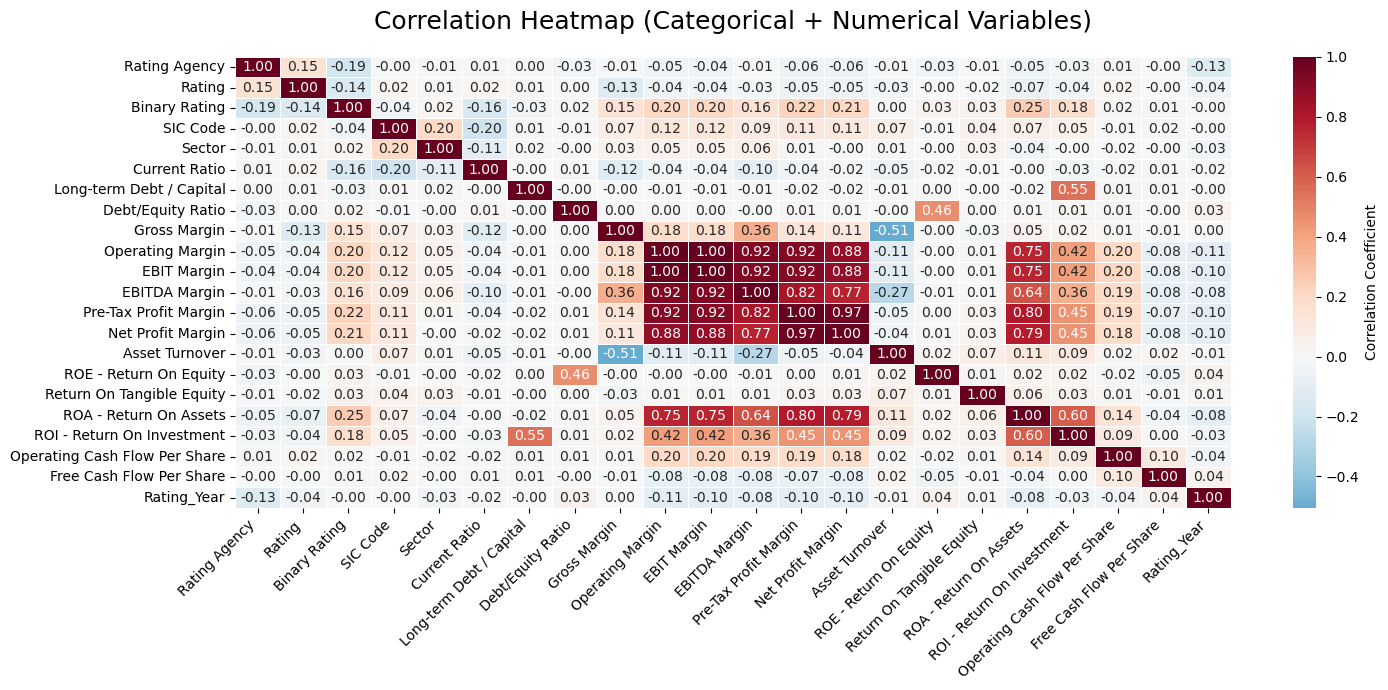

In [ ]:
df_encoded = df.copy()
categorical_cols = df_encoded.select_dtypes(include=['object']).columns

le = LabelEncoder()
for col in categorical_cols:
    try:
        df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    except Exception as e:
        print(f"Skipping {col} due to error: {e}")

corr = df_encoded.corr(numeric_only=True)
fig, ax = plt.subplots(figsize=(15, 7))

sns.heatmap(
    corr,
    annot=True,             # show correlation values
    fmt=".2f",              # 2 decimal precision
    cmap="RdBu_r",          # Blue (+1) to Red (-1)
    center=0,
    linewidths=0.5,
    cbar_kws={'label': 'Correlation Coefficient'},
    ax=ax
)

ax.set_title("Correlation Heatmap", fontsize=18, pad=20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()


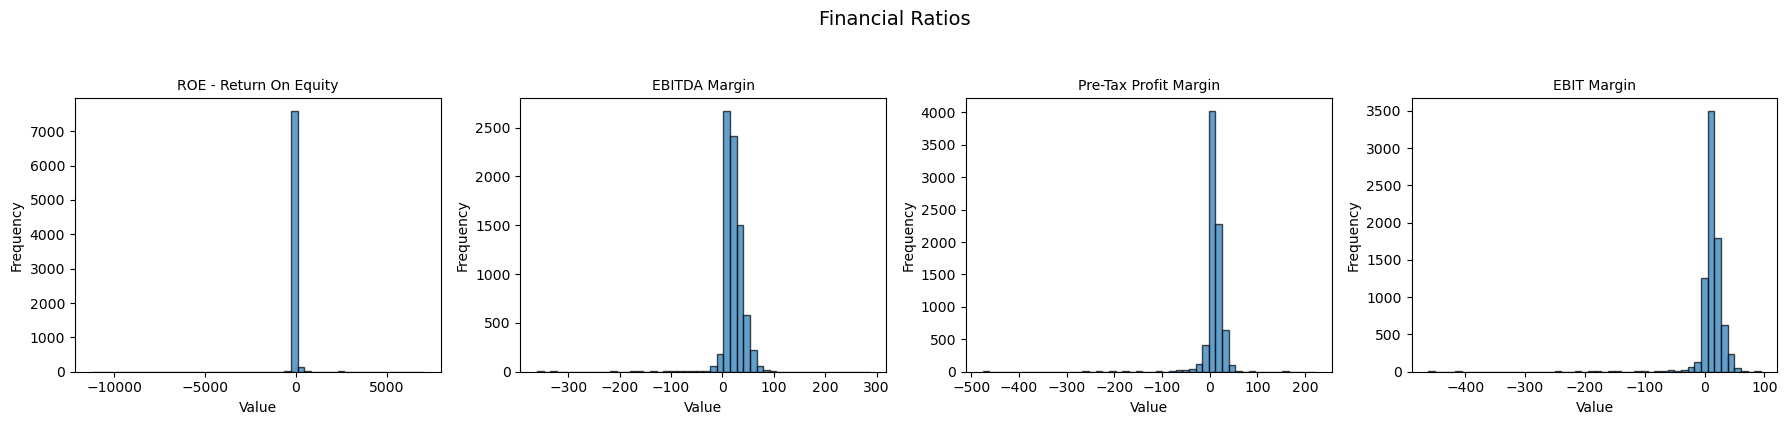

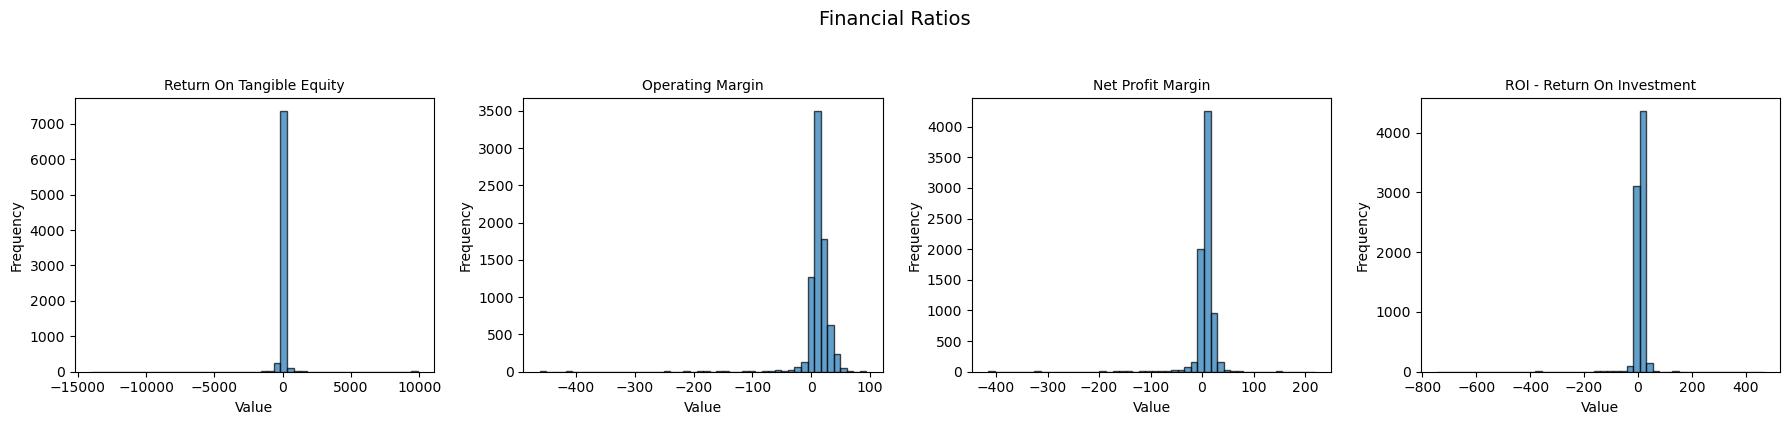

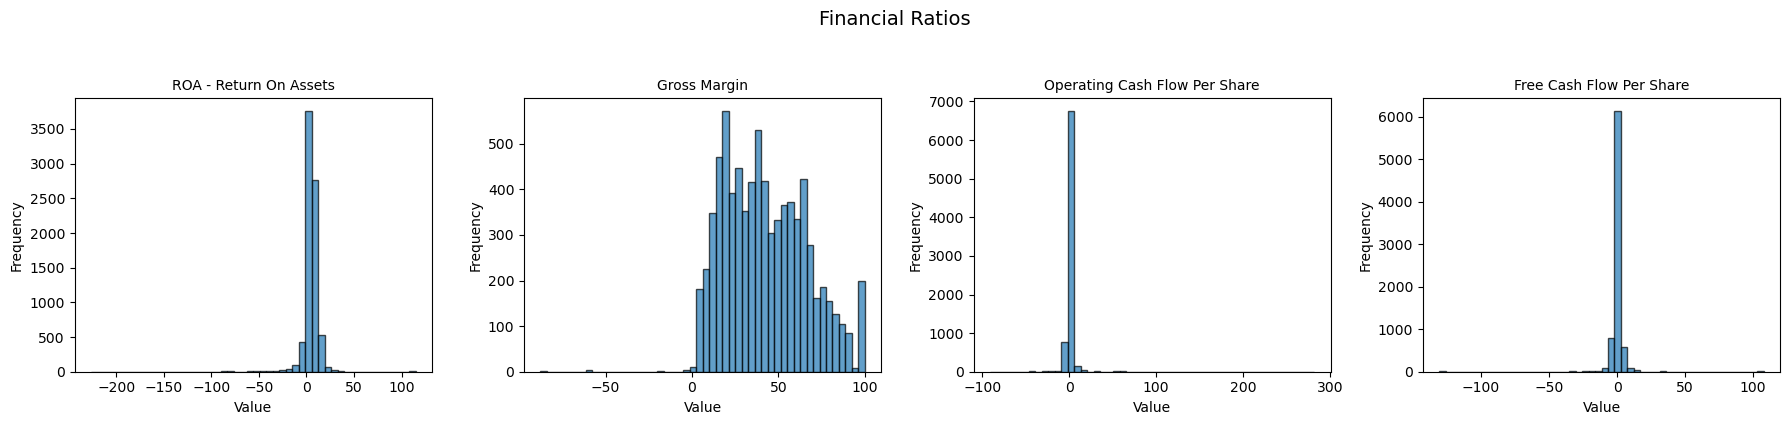

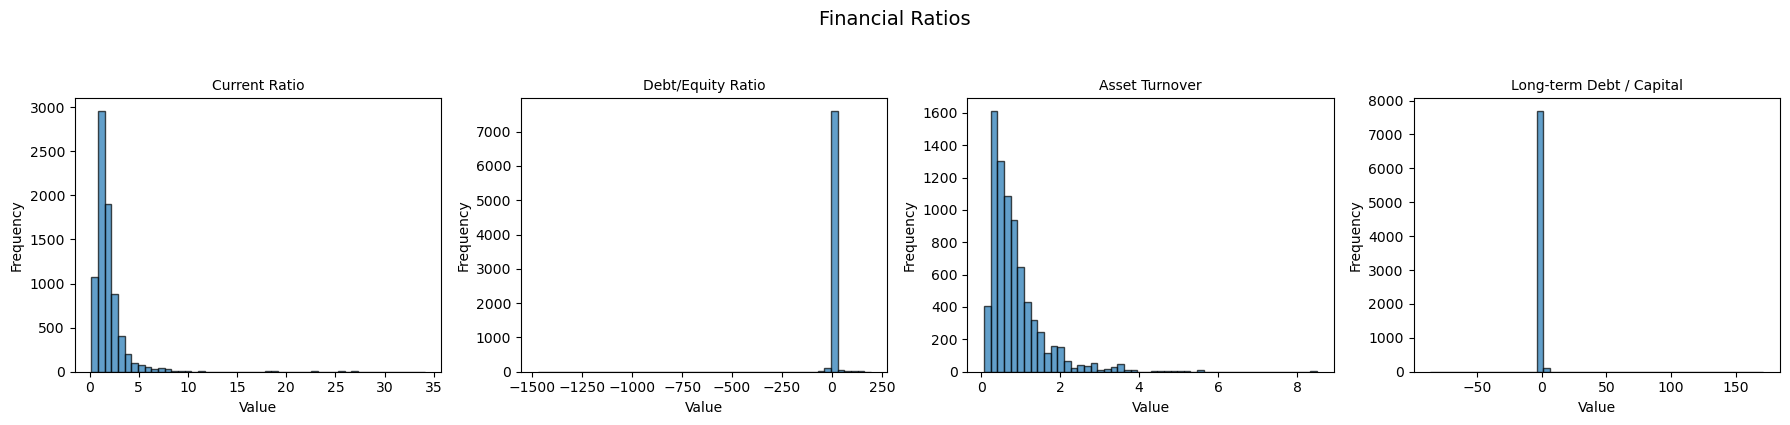

In [ ]:
numeric_cols = [
    'ROE - Return On Equity', 'EBITDA Margin', 'Pre-Tax Profit Margin', 'EBIT Margin',
    'Return On Tangible Equity', 'Operating Margin', 'Net Profit Margin', 'ROI - Return On Investment',
    'ROA - Return On Assets', 'Gross Margin', 'Operating Cash Flow Per Share', 'Free Cash Flow Per Share',
    'Current Ratio', 'Debt/Equity Ratio', 'Asset Turnover', 'Long-term Debt / Capital'
]
groups = [numeric_cols[i:i+4] for i in range(0, len(numeric_cols), 4)]

# --- Plot each group separately ---
for idx, group in enumerate(groups, 1):
    fig, axes = plt.subplots(1, 4, figsize=(18, 4))
    fig.suptitle(f'Financial Ratios', fontsize=14, y=1.05)

    for i, col in enumerate(group):
        if col in df.columns:
            axes[i].hist(df[col].dropna(), bins=50, edgecolor='black', alpha=0.7)
            axes[i].set_title(col, fontsize=10)
            axes[i].set_xlabel('Value')
            axes[i].set_ylabel('Frequency')
        else:
            axes[i].text(0.5, 0.5, f"'{col}' not found", ha='center', va='center')
            axes[i].set_axis_off()

    plt.tight_layout()
    plt.show()


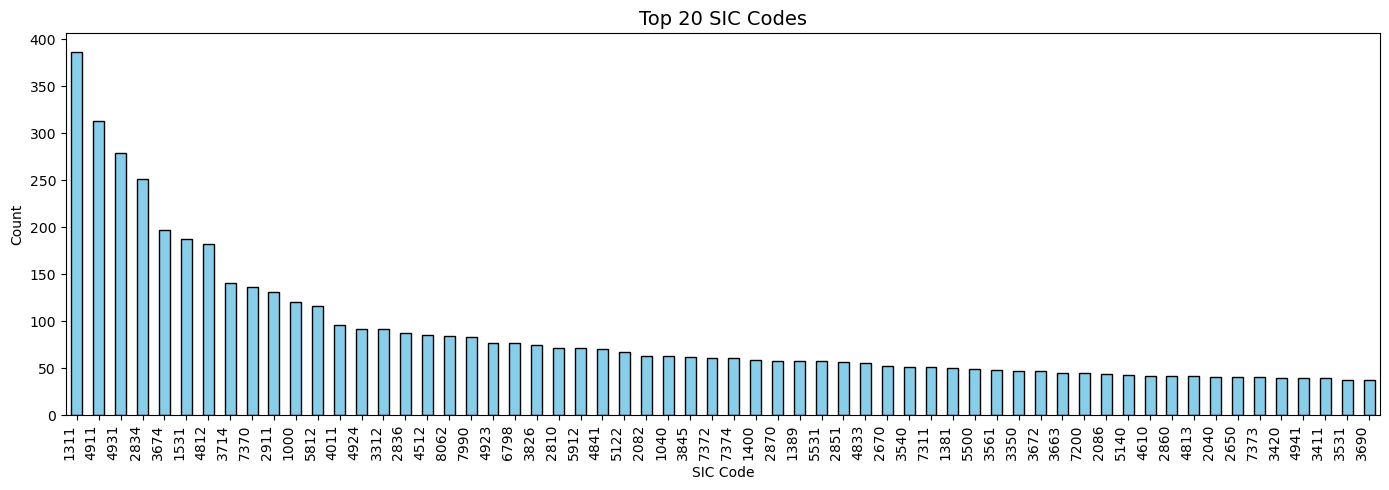

In [40]:
plt.figure(figsize=(14, 5))
df['SIC Code'].value_counts().head(60).plot(kind='bar', edgecolor='black', color='skyblue')
plt.title('Top 20 SIC Codes', fontsize=14)
plt.xlabel('SIC Code')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

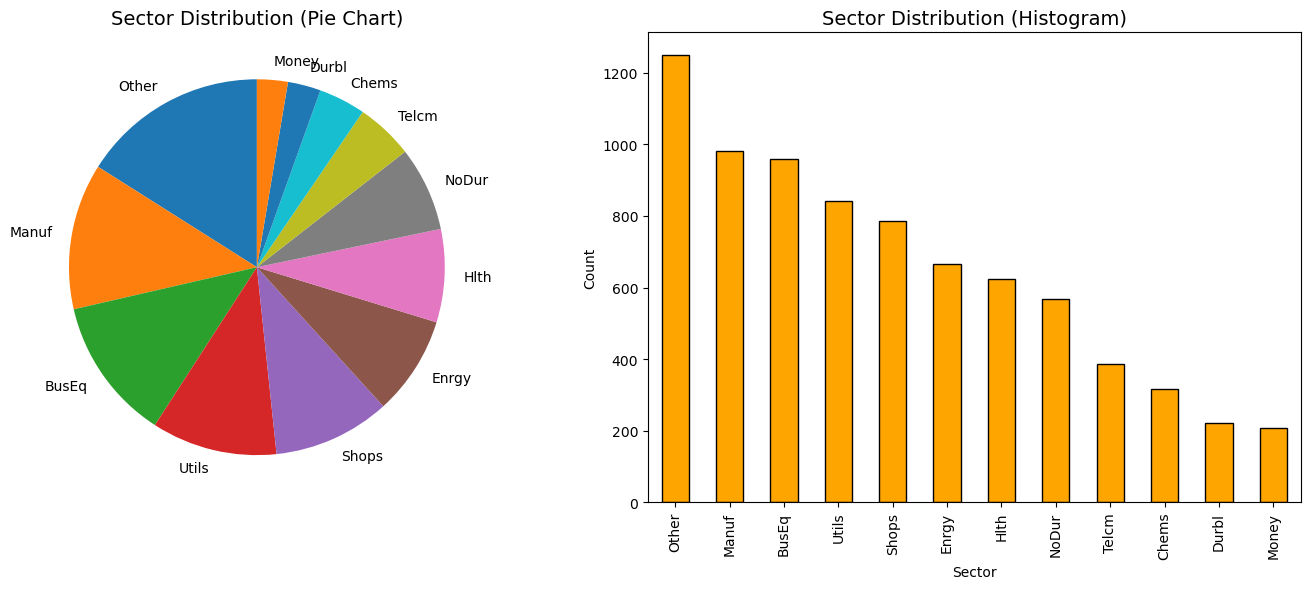

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sector_counts = df['Sector'].value_counts()
axes[0].pie(
    sector_counts,
    labels=sector_counts.index,
    startangle=90,
    textprops={'fontsize': 10}
)
axes[0].set_title('Sector Distribution (Pie Chart)', fontsize=14)
sector_counts.plot(
    kind='bar',
    ax=axes[1],
    edgecolor='black',
    color='orange'
)
axes[1].set_title('Sector Distribution (Histogram)', fontsize=14)
axes[1].set_xlabel('Sector')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()


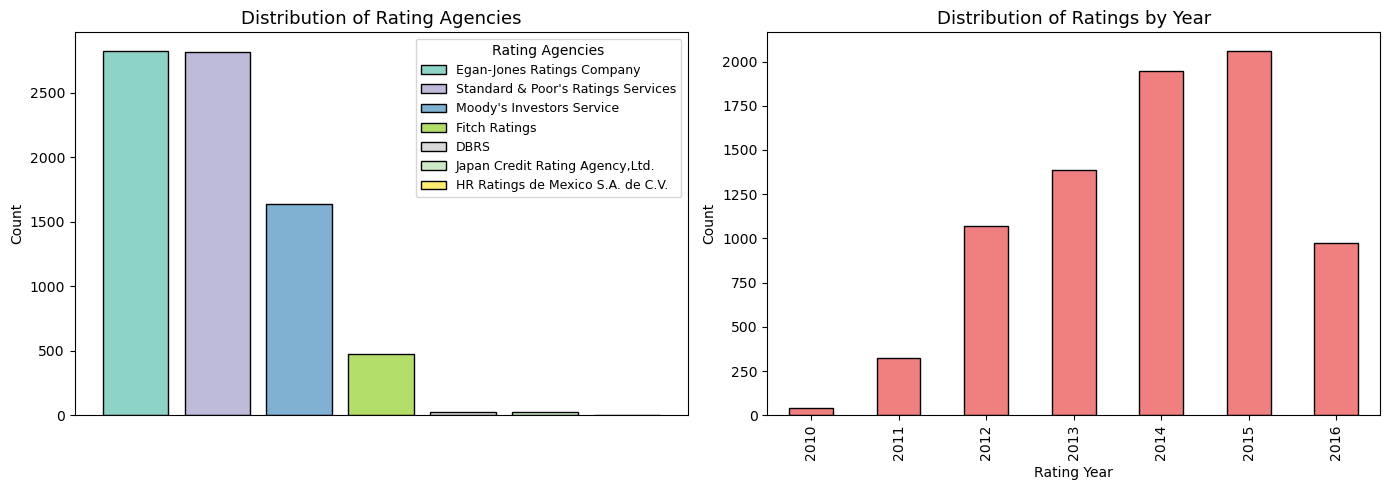

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
agency_counts = df['Rating Agency'].value_counts()
colors = plt.cm.Set3(np.linspace(0, 1, len(agency_counts)))  # distinct colors

bars = axes[0].bar(
    agency_counts.index,
    agency_counts.values,
    color=colors,
    edgecolor='black'
)
axes[0].set_title('Distribution of Rating Agencies', fontsize=13)
axes[0].set_xlabel('')
axes[0].set_ylabel('Count')
axes[0].set_xticks([]) 

axes[0].legend(
    bars,
    agency_counts.index,
    title="Rating Agencies",
    loc='upper right',
    fontsize=9,
    title_fontsize=10,
    frameon=True
)

df['Rating_Year'].value_counts().sort_index().plot(
    kind='bar',
    ax=axes[1],
    edgecolor='black',
    color='lightcoral'
)
axes[1].set_title('Distribution of Ratings by Year', fontsize=13)
axes[1].set_xlabel('Rating Year')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()


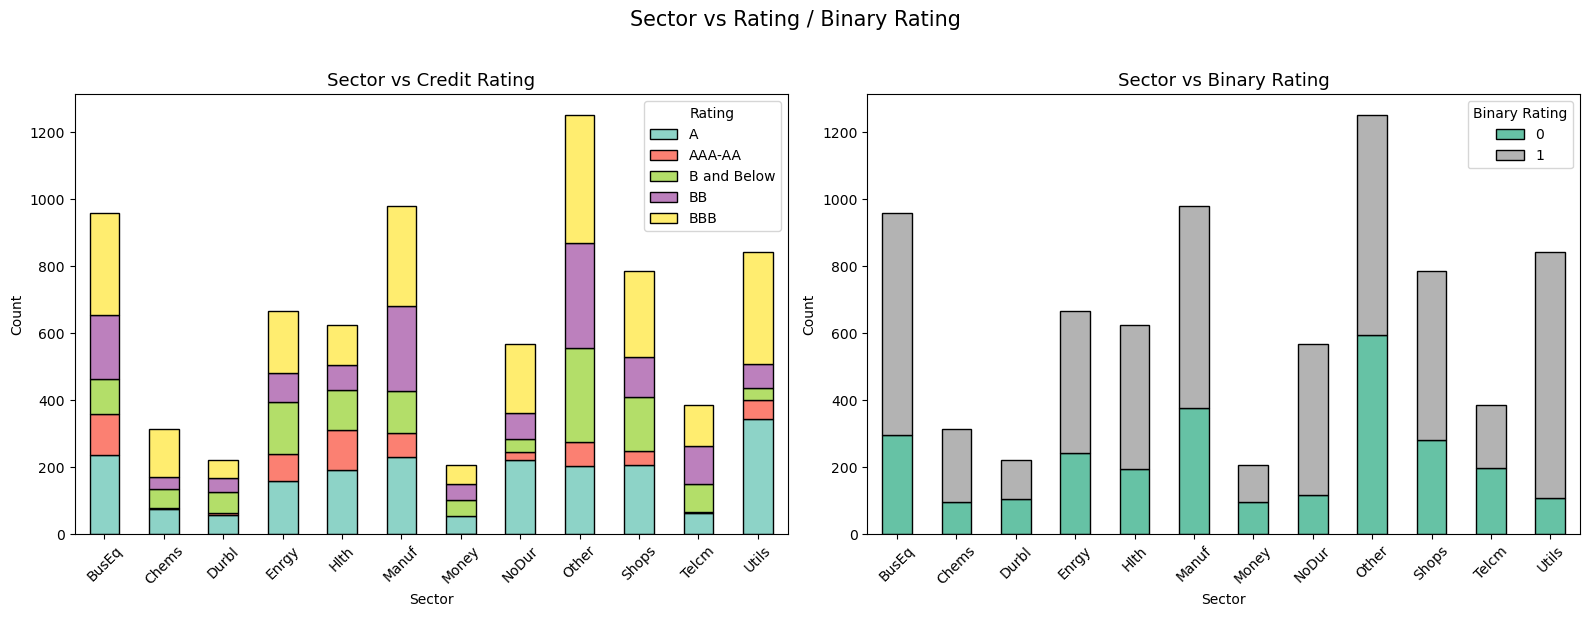

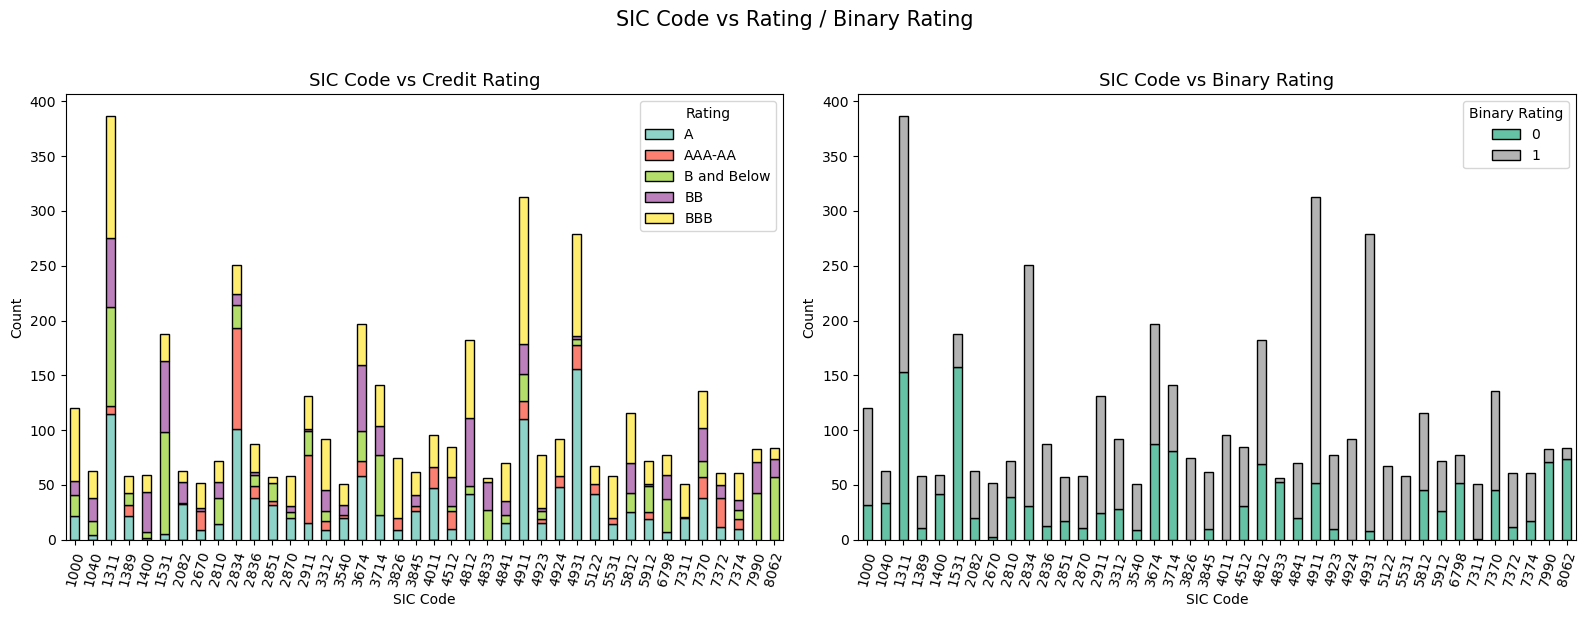

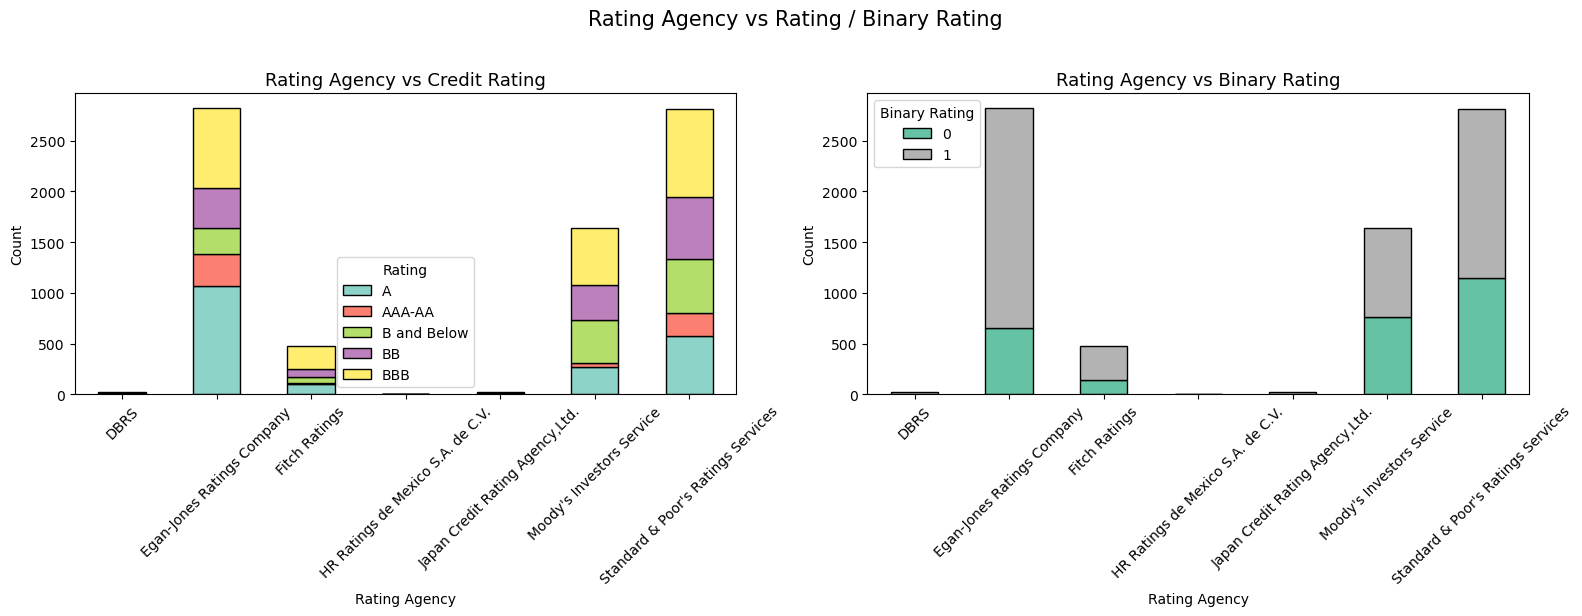

In [78]:
import matplotlib.pyplot as plt
import pandas as pd

# --- Identify categorical columns (excluding Rating_Year) ---
categorical_cols = ['Sector', 'SIC Code', 'Rating Agency']

# --- Loop through each categorical variable ---
for col in categorical_cols:
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    fig.suptitle(f"{col} vs Rating / Binary Rating", fontsize=15, y=1.02)

    # --- If SIC Code, limit to top 40 ---
    if col == 'SIC Code':
        top_sic = df['SIC Code'].value_counts().head(40).index
        df_subset = df[df['SIC Code'].isin(top_sic)]
    else:
        df_subset = df.copy()

    # --- Left Plot: categorical vs Rating ---
    cross_rating = pd.crosstab(df_subset[col], df_subset['Rating'])
    cross_rating.plot(kind='bar', stacked=True, ax=axes[0], colormap='Set3', edgecolor='black')
    axes[0].set_title(f"{col} vs Credit Rating", fontsize=13)
    axes[0].set_xlabel(col)
    axes[0].set_ylabel("Count")
    axes[0].tick_params(axis='x', rotation=75 if col == 'SIC Code' else 45)

    # --- Right Plot: categorical vs Binary Rating ---
    cross_binary = pd.crosstab(df_subset[col], df_subset['Binary Rating'])
    cross_binary.plot(kind='bar', stacked=True, ax=axes[1], colormap='Set2', edgecolor='black')
    axes[1].set_title(f"{col} vs Binary Rating", fontsize=13)
    axes[1].set_xlabel(col)
    axes[1].set_ylabel("Count")
    axes[1].tick_params(axis='x', rotation=75 if col == 'SIC Code' else 45)

    plt.tight_layout()
    plt.show()
